In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# # Python SQL toolkit and Object Relational Mapper (ORM)
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import asc

In [2]:
# connect to postgres
USERNAME = "postgres"
PASSWORD = "postgres"
HOST = "localhost"
PORT = 5432
DATABASE = "crowdfunding"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create the connection engine
engine = create_engine(connection_str)

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names for all tables and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
--------
contact_id INTEGER
first_name VARCHAR(50)
last_name VARCHAR(50)
email VARCHAR(50)

campaign
--------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(500)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(50)
backers_count INTEGER
country VARCHAR(10)
currency VARCHAR(10)
launch_date DATE
end_date DATE
category_id VARCHAR(10)
subcategory_id VARCHAR(10)

category
--------
category_id VARCHAR(10)
category VARCHAR(20)

subcategory
--------
subcategory_id VARCHAR(10)
subcategory VARCHAR(20)



In [4]:
conn = engine.connect() # # Raw SQL/Pandas

In [5]:
# check the data in the campaign station (just for viewing)
query = text("""Select * FROM campaign LIMIT 5""")
df = pd.read_sql(query, con=conn)
df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4


In [6]:
# check the data in the campaign stable
query = text("""Select * FROM campaign LIMIT 1""")
df = pd.read_sql(query, con=conn)
df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1


In [7]:
# check the data in the category table
query = text("""Select * FROM category LIMIT 2""")
df = pd.read_sql(query, con=conn)
df

,category_id,category
0,cat1,food
1,cat2,music


In [8]:
# check the data in the subcategory table
query = text("""Select * FROM subcategory LIMIT 2""")
df = pd.read_sql(query, con=conn)
df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock


In [9]:
# check the data in the contacts table
query = text("""Select * FROM contacts LIMIT 2""")
df = pd.read_sql(query, con=conn)
df

,contact_id,first_name,last_name,email
0,4661,cecilia,velasco,cecilia.velasco@rodrigues.fr
1,3765,mariana,ellis,mariana.ellis@rossi.org


In [10]:
# Find the success ratio of the campaign 
query = text("""
    SELECT 
        c.pledged,
        c.goal,
        (c.pledged / c.goal) AS success_ratio
    FROM 
        campaign AS c
    JOIN 
        category AS cat 
    ON 
        c.category_id = cat.category_id
    WHERE 
        cat.category = 'music'
    ORDER BY 
        success_ratio ASC
    LIMIT 100;
""")

# Execute the query and load the result into a DataFrame
df1 = pd.read_sql(query, con=conn)

# Display the result
df1

,pledged,goal,success_ratio
0,1.0,100.0,0.010000
1,1.0,100.0,0.010000
2,1.0,100.0,0.010000
3,1.0,100.0,0.010000
4,2.0,100.0,0.020000
...,...,...,...
95,12322.0,9200.0,1.339348
96,7322.0,5400.0,1.355926
97,5028.0,3700.0,1.358919
98,121138.0,88400.0,1.370339


In [11]:
# correlations:
corrs=df1.corr(numeric_only=True)
corrs

,pledged,goal,success_ratio
pledged,1.000000,0.783449,0.411432
goal,0.783449,1.000000,0.035558
success_ratio,0.411432,0.035558,1.000000


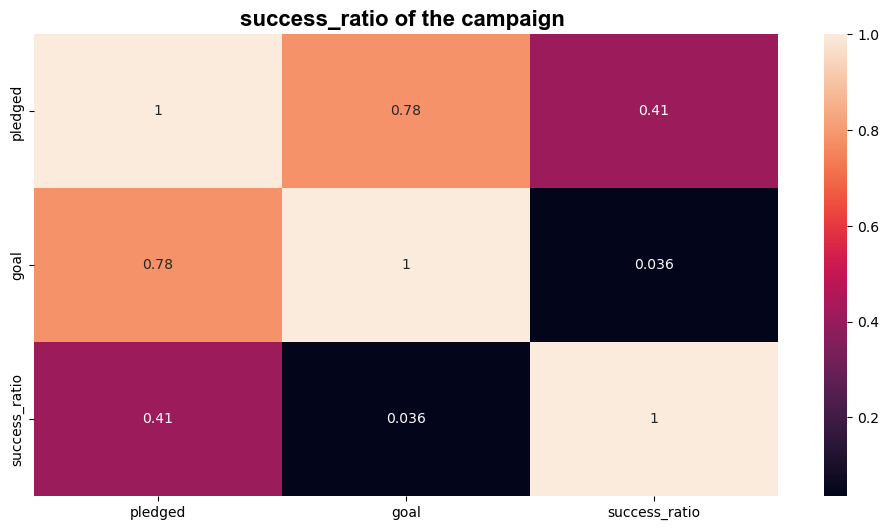

In [12]:

import seaborn as sns

 # Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot, anno (annatation the number on there)
sns.heatmap(corrs, annot=True)

# Customization
plt.title("success_ratio of the campaign ", fontweight="bold", fontsize=16, fontfamily="Arial")
# save
plt.savefig("part4_success ratio - correlations")
# Show/Save the Graph
plt.show()

In [13]:
df1.describe()

,pledged,goal,success_ratio
count,100.000000,100.000000,100.000000
mean,36565.040000,55911.000000,0.636560
std,52770.946453,63739.255613,0.434235
min,1.000000,100.000000,0.010000
25%,2700.750000,5550.000000,0.243051
50%,6677.000000,9600.000000,0.606671
75%,60505.000000,108075.000000,0.982551
max,198628.000000,198500.000000,1.394355


y = 0.0x + 0.62


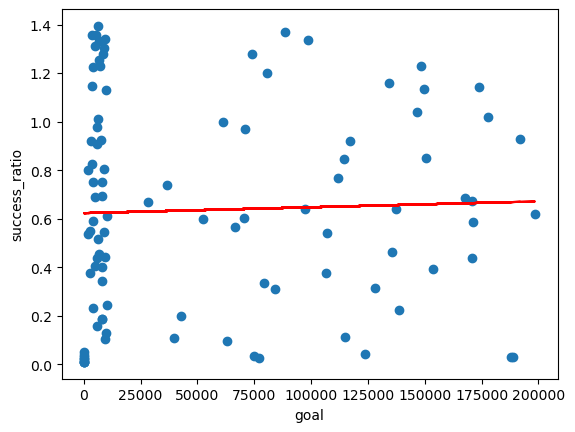

In [14]:
from scipy.stats import linregress
# Add the linear regression equation and line to plot
x_values = df1.goal
y_values = df1.success_ratio
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,4.5), fontsize=15,color="red") ## hien thi regression line
plt.xlabel('goal')
plt.ylabel('success_ratio')
plt.savefig("part4_success ratio with linregress")
plt.show()

In [15]:
# Object Relational Mapper (ORM)
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['campaign', 'subcategory', 'contacts', 'category']

In [16]:
 # Assign Classes to Variables
Category = Base.classes.category
Contacts = Base.classes.contacts
Campaign = Base.classes.campaign
Subcategory = Base.classes.subcategory

In [17]:
# Create a session
session = Session(engine) # ORM

In [18]:
# Query using the ORM session
query = (
    session.query(
        Campaign.category_id,
        Category.category,
        func.count(Campaign.cf_id).label("num_campaigns"),
    )
    .join(Category, Campaign.category_id == Category.category_id)
    .group_by(Campaign.category_id, Category.category)
    .order_by(asc("num_campaigns"))
    .all()
)

df3 = pd.DataFrame(query)
df3.head()

,category_id,category,num_campaigns
0,cat9,journalism,4
1,cat8,photography,42
2,cat1,food,46
3,cat7,games,48
4,cat6,publishing,67


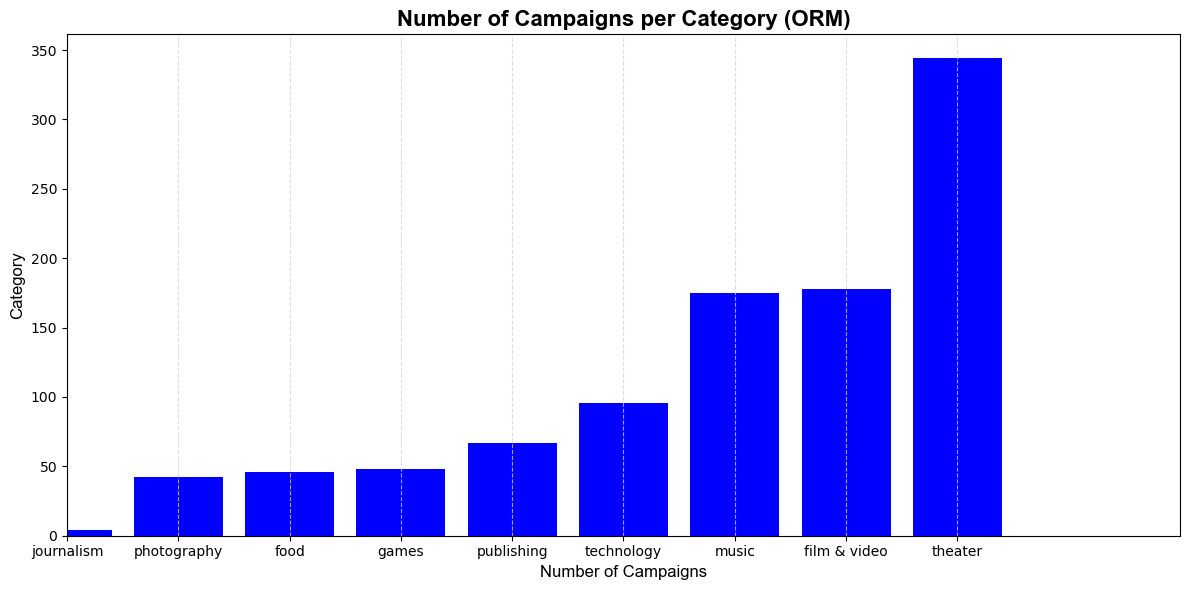

In [19]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(df3.category, df3.num_campaigns, color="blue", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Number of Campaigns", fontfamily="Arial", fontsize=12)
plt.ylabel("Category", fontfamily="Arial", fontsize=12)
plt.title("Number of Campaigns per Category (ORM)", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(0, 10)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.tight_layout()
plt.savefig("part4_categories_ORM.png")
plt.show()

In [20]:
conn.close()
session.close()

In [21]:
engine.dispose()